In [38]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# lokasi dataset/file csv
dataset = "C:\\Users\\lenovo\\Documents\\ML-A11.2022.13993-UAS\\BMRI.JK.csv"


# memeriksa apakah dataset tersebut ada
if not os.path.isfile(dataset):
    raise FileNotFoundError(f"File not found: {dataset}")

# membaca dataset
data = pd.read_csv(dataset)

# Mengatur tampilan Pandas untuk menampilkan semua baris dan kolom
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom
pd.set_option('display.max_colwidth', None)  # Menampilkan lebar kolom penuh

# Menampilkan seluruh DataFrame
print(data)


           Date    Open    High     Low   Close    Adj Close     Volume
0    2023-07-24  5550.0  5625.0  5500.0  5500.0  5232.403320   54865000
1    2023-07-25  5550.0  5575.0  5500.0  5550.0  5279.970703   65237300
2    2023-07-26  5550.0  5600.0  5525.0  5575.0  5303.754395   88526700
3    2023-07-27  5575.0  5700.0  5575.0  5625.0  5351.321289   86556200
4    2023-07-28  5625.0  5725.0  5625.0  5700.0  5422.672363  121968500
5    2023-07-31  5800.0  5800.0  5625.0  5725.0  5446.456055  189375700
6    2023-08-01  5650.0  5725.0  5600.0  5650.0  5375.104980  114702500
7    2023-08-02  5625.0  5750.0  5600.0  5700.0  5422.672363  133546200
8    2023-08-03  5725.0  5825.0  5700.0  5800.0  5517.807129   68587500
9    2023-08-04  5800.0  5825.0  5750.0  5775.0  5494.023438   47144200
10   2023-08-07  5850.0  5925.0  5825.0  5875.0  5589.158203  104342100
11   2023-08-08  5900.0  5950.0  5875.0  5900.0  5612.941406   66473200
12   2023-08-09  5900.0  5950.0  5850.0  5900.0  5612.941406   6

In [10]:
# memeriksa info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       239 non-null    object 
 1   Open       239 non-null    float64
 2   High       239 non-null    float64
 3   Low        239 non-null    float64
 4   Close      239 non-null    float64
 5   Adj Close  239 non-null    float64
 6   Volume     239 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.2+ KB


In [39]:
# mengurutkan data berdasarkan tanggal
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
print(data.head())

        Date    Open    High     Low   Close    Adj Close     Volume
0 2023-07-24  5550.0  5625.0  5500.0  5500.0  5232.403320   54865000
1 2023-07-25  5550.0  5575.0  5500.0  5550.0  5279.970703   65237300
2 2023-07-26  5550.0  5600.0  5525.0  5575.0  5303.754395   88526700
3 2023-07-27  5575.0  5700.0  5575.0  5625.0  5351.321289   86556200
4 2023-07-28  5625.0  5725.0  5625.0  5700.0  5422.672363  121968500


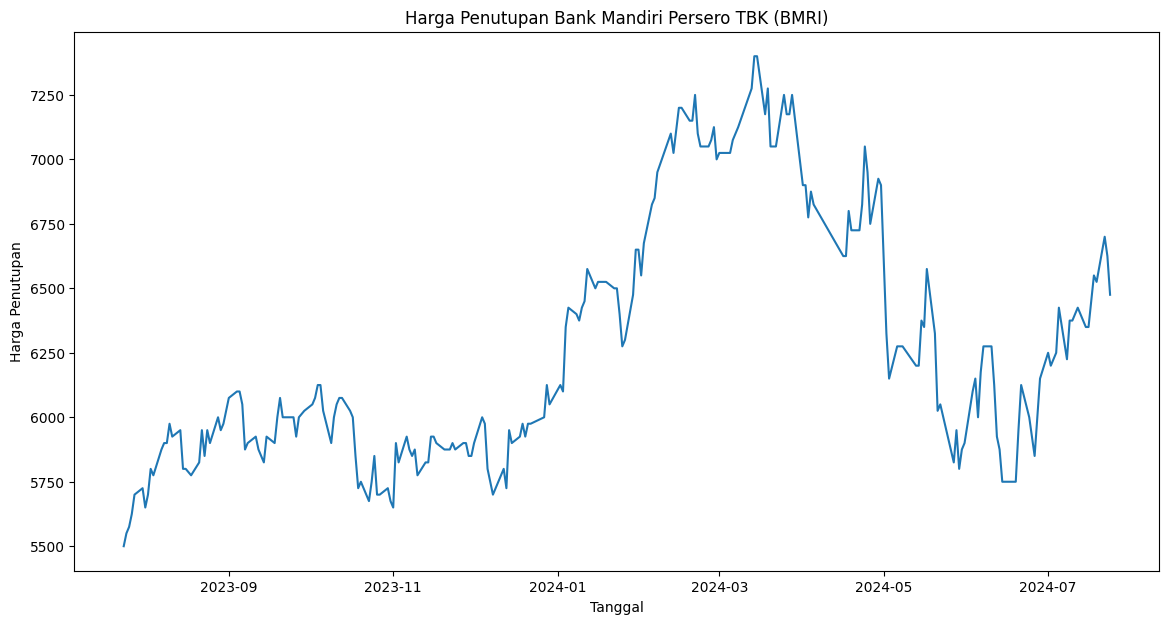

In [40]:
# Membuat kolom 'Days' sebagai jumlah hari dari tanggal awal data
data['Days'] = (data['Date'] - data['Date'].min()).dt.days

# harga penutupan  Bank Mandiri Persero TBK (BMRI
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'])
plt.title('Harga Penutupan Bank Mandiri Persero TBK (BMRI)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.show()

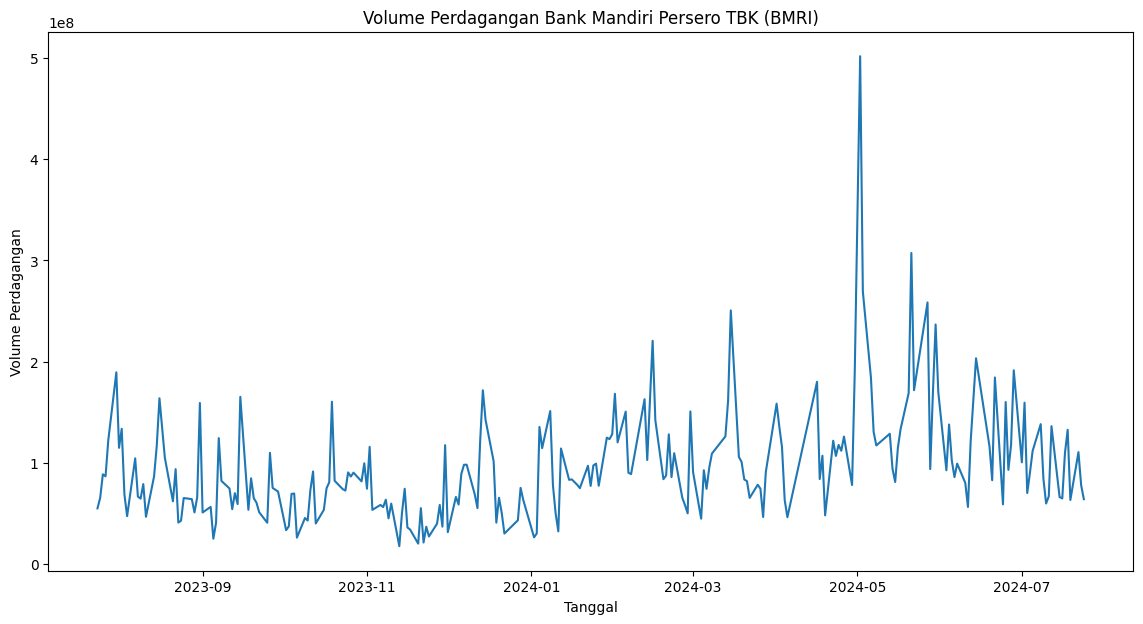

In [14]:
#volume perdaganan
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volume'])
plt.title('Volume Perdagangan Bank Mandiri Persero TBK (BMRI)')
plt.xlabel('Tanggal')
plt.ylabel('Volume Perdagangan')
plt.show()

In [15]:
# Statistik deskriptif Bank Mandiri
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Days
count,239,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,239.00000
mean,2024-01-17 14:27:36.903765760,6252.615063,6324.058577,6179.916318,6250.104603,6046.475553,9.544368e+07,177.60251
min,2023-07-24 00:00:00,5550.000000,5575.000000,5500.000000,5500.000000,5232.403320,1.744460e+07,0.00000
25%,2023-10-17 12:00:00,5900.000000,5950.000000,5825.000000,5900.000000,5612.941406,6.119040e+07,85.50000
50%,2024-01-12 00:00:00,6075.000000,6150.000000,6025.000000,6075.000000,5875.000000,8.375350e+07,172.00000
75%,2024-04-22 12:00:00,6525.000000,6625.000000,6475.000000,6525.000000,6387.500000,1.172152e+08,273.50000
max,2024-07-24 00:00:00,7450.000000,7500.000000,7275.000000,7400.000000,7250.000000,5.018493e+08,366.00000
std,NaN,477.355903,479.973578,463.844450,470.481036,507.013106,5.456896e+07,107.89018


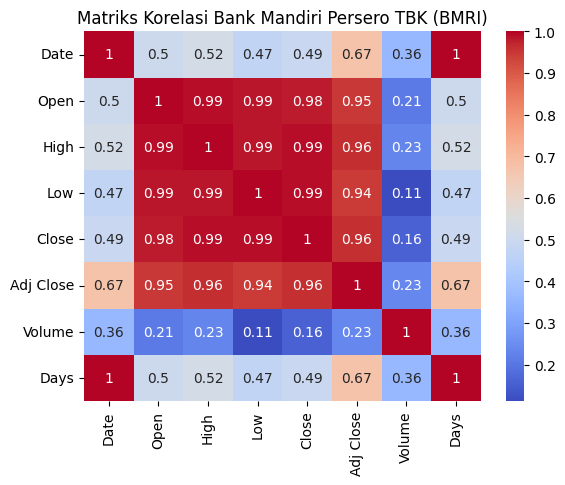

In [16]:
# matriks korelasi bank mandiri
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Bank Mandiri Persero TBK (BMRI)')
plt.show()

In [18]:
# pisahkan fitur dan target
X = data[['Days', 'Volume', 'Open', 'High', 'Low']]  # Contoh fitur
y = data['Close']

# tampilkan bentuk fitur dan target
print(f'Bentuk Fitur X: {X.shape}')
print(f'Bentuk Target y: {y.shape}')

from sklearn.model_selection import train_test_split

# bagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# tampilkan ukuran pelatihan dan pengujian
print(f'Ukuran Data Pelatihan: {X_train.shape[0]} Samples')
print(f'Ukuran Data Pengujian: {X_test.shape[0]} Samples')

Bentuk Fitur X: (239, 5)
Bentuk Target y: (239,)
Ukuran Data Pelatihan: 191 Samples
Ukuran Data Pengujian: 48 Samples


In [20]:
# membuat model regresi linear dan melatihnya serta menampilkan koefisien dan intersep model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f'Koefisien: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Koefisien: [-1.45329134e-02 -6.26025764e-08 -3.65877163e-01  7.77199550e-01
  5.86911600e-01]
Intercept: 7.163014936747459


In [21]:
# Menambahkan kolom 'Date' ke data pengujian
X_test_with_date = X_test.copy()
X_test_with_date['Date'] = data.loc[X_test.index, 'Date'].values

# prediksi harga saham
y_pred = model.predict(X_test)

# dataFrame hasil
results = pd.DataFrame({
    'Date': X_test_with_date['Date'],
    'Actual': y_test.values,
    'Predicted': y_pred
})

# Menampilkan beberapa contoh hasil
print(results.head())

          Date  Actual    Predicted
24  2023-08-28  6000.0  5971.085630
6   2023-08-01  5650.0  5668.832488
93  2023-12-04  6000.0  5978.672818
109 2023-12-28  6125.0  6087.868716
104 2023-12-19  5975.0  5946.709680


In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Menentukan tanggal yang akan diprediksi
tanggal_prediksi = pd.to_datetime('2024-07-30')
print(f"Tanggal yang diprediksi: {tanggal_prediksi}")

# Menghitung jumlah hari dari tanggal awal data ke tanggal yang akan diprediksi
tanggal_awal = data['Date'].min()
days_pilih = (tanggal_prediksi - tanggal_awal).days

# Estimasi nilai fitur untuk tanggal yang diprediksi
volume_prediksi = data['Volume'].mean()
open_prediksi = data['Open'].mean()
high_prediksi = data['High'].mean()
low_prediksi = data['Low'].mean()

# Membuat DataFrame untuk tanggal yang diprediksi
X_prediksi = pd.DataFrame({
    'Days': [days_pilih],
    'Volume': [volume_prediksi],
    'Open': [open_prediksi],
    'High': [high_prediksi],
    'Low': [low_prediksi]
})

# Memprediksi harga untuk tanggal yang diprediksi
y_prediksi = model.predict(X_prediksi)

# Menampilkan hasil
print(f"Prediksi harga saham pada tanggal {tanggal_prediksi} adalah : {y_prediksi[0]}")

Tanggal yang diprediksi: 2024-07-30 00:00:00
Prediksi harga saham pada tanggal 2024-07-30 00:00:00 adalah : 6250.212740849219


In [30]:
# Mengevaluasi model dan validasi silang model
from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

from sklearn.model_selection import cross_val_score

# Validasi
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Validasi silang: {-cv_scores.mean()}')

Mean Squared Error: 1928.6430408620065
R-squared: 0.9908687810410294
Validasi silang: 2148.0641659688054
